# Task 1: Dataset Selection
a. Choose two datasets from the provided repositories.


b. Justify your selection for each dataset based on its relevance to
machine learning tasks. Include a brief paragraph explaining the
dataset's potential for analysis and its suitability for machine
learning applications


Data Types:
Library Full Name                                      object
Library Number                                         object
Survey Year From                                        int64
A1.3 Ontario Library Service (OLS) Region (English)    object
A1.4 Type of Library Service (English)                 object
                                                        ...  
P1.1  Resident Population Served                       object
P1.2  Contracting Population Served                    object
P2.1  Contracting Households Served                    object
P2.2  Resident Households Served                       object
Unnamed: 328                                            int64
Length: 329, dtype: object
       Survey Year From  C0.4.F  French Special Collections - Original Format  \
count             364.0                                         364.000000      
mean             2022.0                                           5.711538      
std                 0.0            

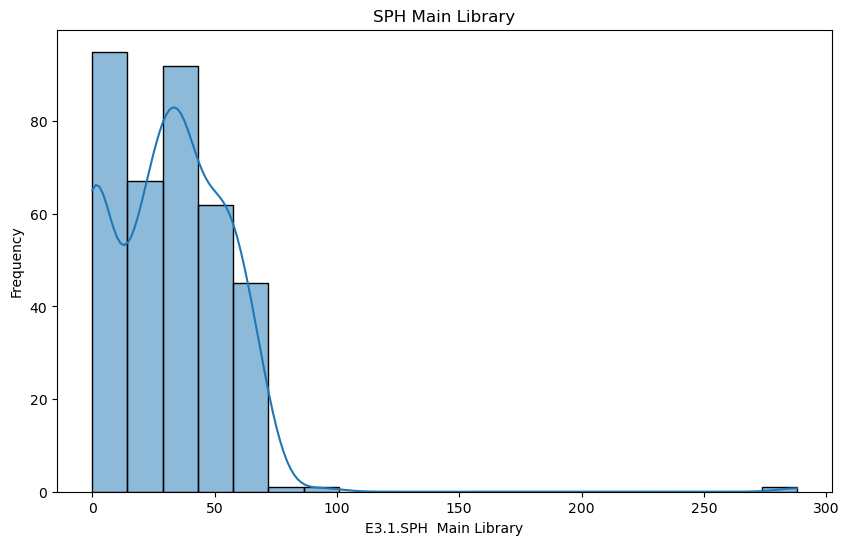

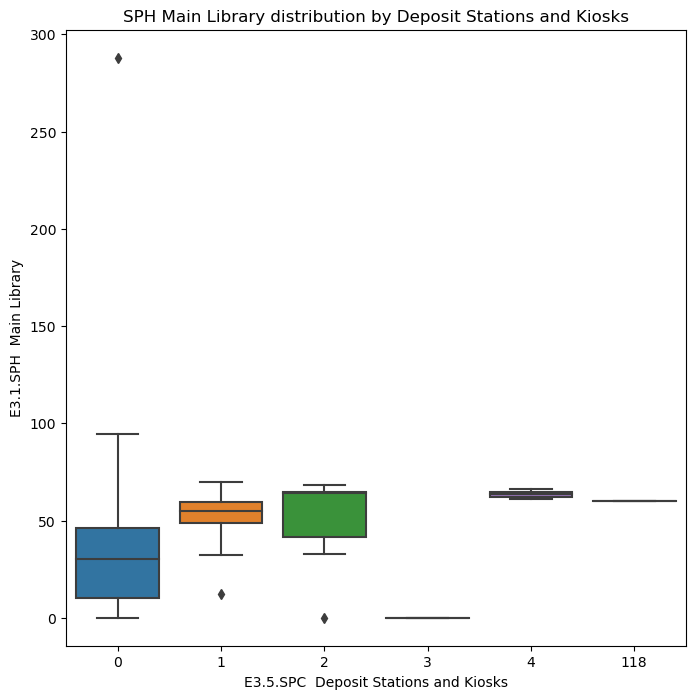

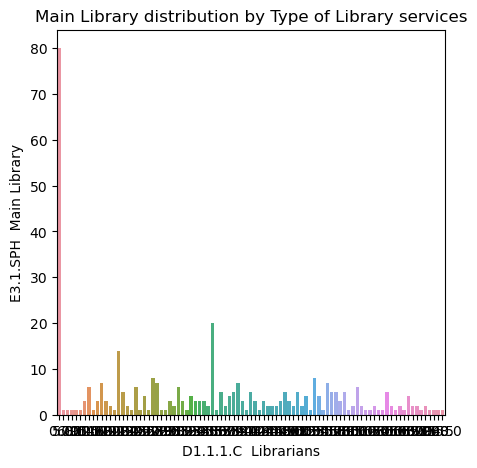

Missing Values:
Library Full Name                                      0
Library Number                                         0
Survey Year From                                       0
A1.3 Ontario Library Service (OLS) Region (English)    0
A1.4 Type of Library Service (English)                 0
                                                      ..
P1.1  Resident Population Served                       0
P1.2  Contracting Population Served                    0
P2.1  Contracting Households Served                    0
P2.2  Resident Households Served                       0
Unnamed: 328                                           0
Length: 329, dtype: int64
   Survey Year From  C0.4.F  French Special Collections - Original Format  \
0              2022                                                  0      
1              2022                                                  0      
2              2022                                                  0      
3              2022    

C:\Users\Owner\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Owner\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Owner\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
import sklearn.metrics as metrics

df = pd.read_csv('ontario_public_library_statistics_2022_open_data.csv', encoding='ISO-8859-1')
df.head()
data_types = df.dtypes
print("\nData Types:")
print(data_types)
print(df.describe())

plt.figure(figsize=(10, 6))
sns.histplot(df['E3.1.SPH  Main Library'], bins=20, kde=True)
plt.title('SPH Main Library')
plt.xlabel('E3.1.SPH  Main Library')
plt.ylabel('Frequency')
plt.show()

# Visualization - SPH Main Library distribution by Type of Library services
plt.figure(figsize=(8, 8))
sns.boxplot(y='E3.1.SPH  Main Library', x='E3.5.SPC  Deposit Stations and Kiosks (refer to criteria)', data=df)
plt.title('SPH Main Library distribution by Deposit Stations and Kiosks')
plt.ylabel('E3.1.SPH  Main Library')
plt.xlabel('E3.5.SPC  Deposit Stations and Kiosks')
plt.show()

# Visualization 
plt.figure(figsize=(5, 5))
sns.countplot(x='E3.1.SPH  Main Library', data=df)
plt.title('Main Library distribution by Type of Library services')
plt.xlabel('D1.1.1.C  Librarians')
plt.ylabel('E3.1.SPH  Main Library')
plt.show()
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)
from scipy.stats import zscore

# Calculate the Z-score for numeric columns
z_scores = df.select_dtypes(include=['int64', 'float64']).apply(zscore)

# Define a threshold for outliers (e.g., Z-score > 3 or < -3)
outlier_threshold = 3

# Remove rows with outlier values for each numeric column
df_no_outliers = df[(z_scores.abs() < outlier_threshold).all(axis=1)]


numeric_df = df.select_dtypes(include=['number'])
print(numeric_df.head())

# Example: Apply log transformation on a skewed numeric feature
import numpy as np
# df['log_transformed_column'] = np.log(df['E3.1.SPH  Main Library'] + 1)


numeric_df['A1.4 Type of Library Service (English)'] = df['A1.4 Type of Library Service (English)']
print(numeric_df.head())
# Separate features and target variable
X = numeric_df.drop('A1.4 Type of Library Service (English)', axis=1)
y = numeric_df['A1.4 Type of Library Service (English)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Support Vector Machine (SVM) Classifier
svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train, y_train)

# Predict using SVM model
y_pred_svm = svm_model.predict(X_test)

# Evaluate SVM model
print("Support Vector Machine (SVM) Classifier:")
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_svm))
print("Classification Report:")
print(metrics.classification_report(y_test, y_pred_svm))
print("Confusion Matrix:")
print(metrics.confusion_matrix(y_test, y_pred_svm))

# 2. Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict using Random Forest model
y_pred_rf = rf_model.predict(X_test)

# Evaluate Random Forest model
print("\nRandom Forest Classifier:")
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_rf))
print("Classification Report:")
print(metrics.classification_report(y_test, y_pred_rf))
